# Análisis Multivariado de Datos
## Taller 3er Corte

**Profesor**: Diego León

**Estudiantes**
*    Karen Natalia Pulido Rodríguez
*    Manuel Aguirre
*    Carlos Manuel Carvajales Castrillo
*    Juan Manuel Castillo Santamaria
*    Mateo Ruiz Mendoza
*    Carlos Alberto Trujillo



## Date Fruit Datasets

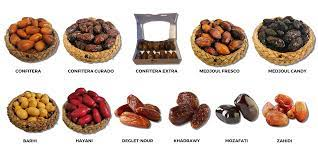

Una gran cantidad de frutas se cultivan en todo el mundo, cada una de las cuales tiene varios tipos. Los factores que determinan el tipo de fruto son las características de la apariencia externa como el color, la longitud, el diámetro y la forma. La apariencia externa de los frutos es un determinante importante del tipo de fruto. Determinar la variedad de frutas observando su apariencia externa puede requerir experiencia, lo que lleva mucho tiempo y requiere un gran esfuerzo. 

Esta base de datos se construyó con el fin de clasificar los tipos de dátiles, es decir, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi y Sagai, utilizando tres métodos diferentes de aprendizaje automático. De acuerdo con este propósito, se obtuvieron 898 imágenes de siete tipos diferentes de frutos de dátiles a través del sistema de visión por computadora (CVS). A través de técnicas de procesamiento de imágenes, se extrajeron de estas imágenes un total de 34 características, incluidas características morfológicas, forma y color. Primero, los modelos se desarrollaron utilizando los métodos de regresión logística (LR) y red neuronal artificial (ANN), que se encuentran entre los métodos de aprendizaje automático. Los resultados de rendimiento logrados con estos métodos son 91,0% y 92,2%, respectivamente. Luego, con el modelo de apilamiento creado mediante la combinación de estos modelos, el resultado de rendimiento se incrementó al 92,8 %. Se ha concluido que los métodos de aprendizaje automático se pueden aplicar con éxito para la clasificación de tipos de frutos de dátil.

Referencia: https://www.kaggle.com/datasets/whenamancodes/date-fruit-datasets?resource=download

## Diccionario de Datos

```
% DATASET: https://www.muratkoklu.com/datasets/
% Citation Request :
% KOKLU, M., KURSUN, R., TASPINAR, Y. S., and CINAR, I. (2021). Classification of Date Fruits into Genetic Varieties Using Image Analysis. Mathematical Problems in Engineering, Vol.2021, Article ID: 4793293, DOI:10.1155/2021/4793293
% https://www.hindawi.com/journals/mpe/2021/4793293/
```


```
@RELATION Date_Fruit_Datasets
@ATTRIBUTE AREA	INTEGER
@ATTRIBUTE PERIMETER	REAL
@ATTRIBUTE MAJOR_AXIS	REAL
@ATTRIBUTE MINOR_AXIS	REAL
@ATTRIBUTE ECCENTRICITY	REAL
@ATTRIBUTE EQDIASQ	REAL
@ATTRIBUTE SOLIDITY	REAL
@ATTRIBUTE CONVEX_AREA	INTEGER
@ATTRIBUTE EXTENT	REAL
@ATTRIBUTE ASPECT_RATIO	REAL
@ATTRIBUTE ROUNDNESS	REAL
@ATTRIBUTE Class	{BERHI, DEGLET, DOKOL, IRAQI, ROTANA, SAFAVI, SOGAY}
```



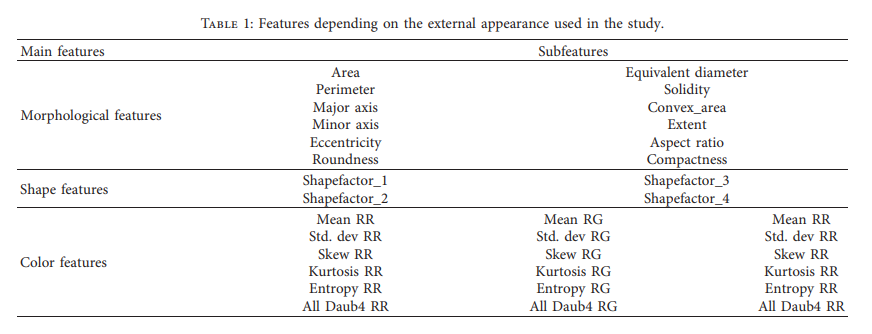

In [ ]:
# Importa paquetes
# -----------------------------
import numpy as np
import sympy as spp
import matplotlib.pyplot as plt
from scipy.stats import t
import pandas as pd
import seaborn as sns
spp.init_printing()

# Importación de datos

In [ ]:
# Se importan desde el archivo disponible en el entorno
# de ejecución.
data = pd.read_csv('Date_Fruit_Datasets.csv')
del(data['ASPECT_RATIO'],data['Class'])
data = data.iloc[:, :10] #Tomamos las 10 primeras variables.
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ROUNDNESS
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,0.9374
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,0.9773
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,0.9446
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,0.9458
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,0.9358
...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,0.8658
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,0.6475
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,0.8609
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,0.8263


# Análisis descriptivo de los datos

In [ ]:
data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ROUNDNESS
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,0.857720
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,0.070839
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,0.004800
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,0.827750
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,0.867750
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,0.899500
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,0.977300


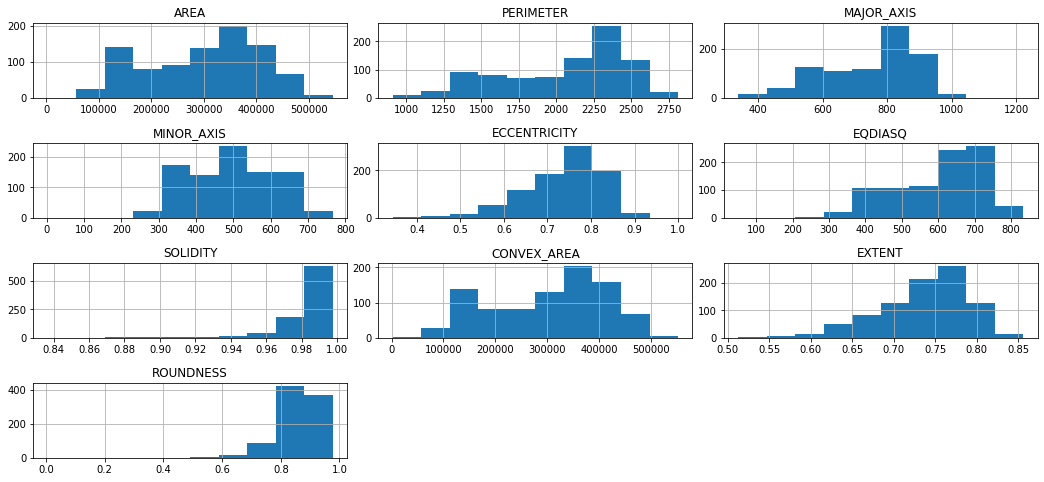

In [ ]:
data.hist(figsize=(18,8)); plt.subplots_adjust(hspace = 0.6, wspace = 0.1); plt.show()

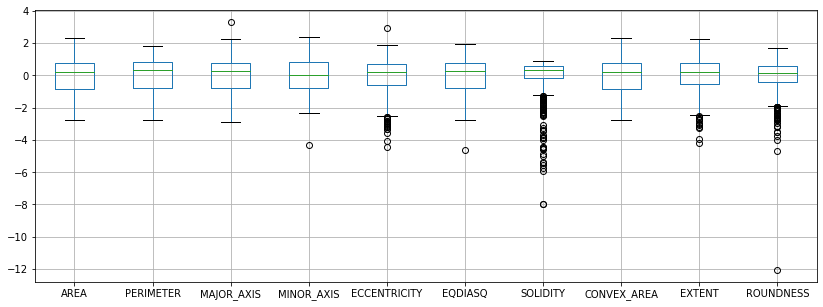

In [ ]:
data_estd = (data-data.mean())/data.std()
data_estd.boxplot(figsize=(14,5)); plt.show()

#Observaciones: 

* Dado que los datos tienen escalas que difieren mucho unas de otras en cuanto a magnitud, fue necesario estandarizar los datos para mostrar la gráfica de caja y bigotes, así como también, para poder realizar de manera adecuada el Análisis de Componentes Principales, haciendo uso de la matriz de correlaciones.

* Podemos observar tambien que hay una cantidad considerable de datos atipicos alejados de la mediana en algunas variables, que no se toman en cuenta para el analisis descriptivo. 

* Los datos en su gran mayoria estan agrupados en el intervalo $(-2,2)$, por lo que su correlacion es buena.  

# Analisis de componentes principales

In [ ]:
data_estd.corr()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ROUNDNESS
AREA,1.000000,0.956494,0.878893,0.954899,-0.370303,0.993243,0.027371,0.998886,-0.086286,0.044346
PERIMETER,0.956494,1.000000,0.960734,0.859990,-0.166816,0.959938,-0.133857,0.963489,-0.214632,-0.235744
MAJOR_AXIS,0.878893,0.960734,1.000000,0.721133,0.063090,0.886277,-0.166982,0.886948,-0.279951,-0.355258
MINOR_AXIS,0.954899,0.859990,0.721133,1.000000,-0.607120,0.948006,0.059613,0.951470,0.028003,0.243655
ECCENTRICITY,-0.370303,-0.166816,0.063090,-0.607120,1.000000,-0.335085,-0.220434,-0.356565,-0.342775,-0.659626
EQDIASQ,0.993243,0.959938,0.886277,0.948006,-0.335085,1.000000,0.018777,0.993397,-0.112353,0.035564
SOLIDITY,0.027371,-0.133857,-0.166982,0.059613,-0.220434,0.018777,1.000000,-0.016449,0.392552,0.611010
CONVEX_AREA,0.998886,0.963489,0.886948,0.951470,-0.356565,0.993397,-0.016449,1.000000,-0.107403,0.015083
EXTENT,-0.086286,-0.214632,-0.279951,0.028003,-0.342775,-0.112353,0.392552,-0.107403,1.000000,0.470357
ROUNDNESS,0.044346,-0.235744,-0.355258,0.243655,-0.659626,0.035564,0.611010,0.015083,0.470357,1.000000


Porcentaje de variabilidad acumulada: 
 [0.57714312 0.83719915 0.91613054 0.97839858 0.99627966 0.99871532
 0.9996518  0.99991958 0.99999218 1.        ] 

La componentes principales son: 
 a1= [ 0.41437999  0.40504048  0.37400973  0.39514622 -0.14605527  0.41362736
 -0.01565693  0.41517938 -0.05588541 -0.00675661] 
 a2= [-0.03820287  0.12348649  0.21959019 -0.16770704  0.46301955 -0.02301445
 -0.42708238 -0.01741714 -0.42536692 -0.5730529 ]


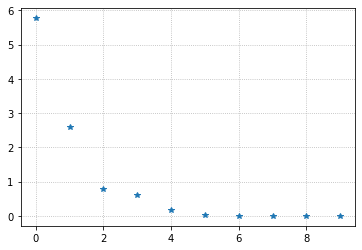

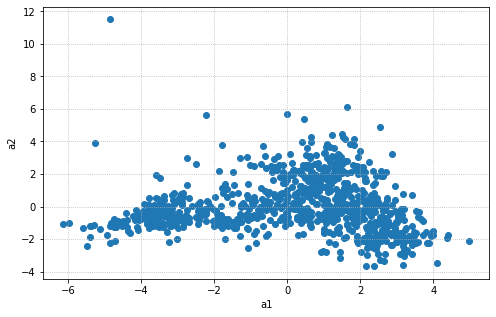

In [ ]:
val_prop, vec_prop_ = np.linalg.eig(data_estd.corr())
vec_prop, val_prop = np.zeros((len(val_prop),len(val_prop))), np.sort(val_prop)[::-1]
ind = np.argsort(val_prop)[::-1]
for j in range(len(val_prop)): vec_prop[:,j] = vec_prop_[:,ind[j]]
v = val_prop/sum(val_prop)
v_acum = np.zeros(len(val_prop)); v_acum[0] = v[0]
for i in range(len(val_prop)): v_acum[i] = sum(v[0:i+1])
a1 = vec_prop.T[0].T; a2 = vec_prop.T[1].T
print('Porcentaje de variabilidad acumulada: \n', v_acum, '\n')
print('La componentes principales son: \n a1=',a1, '\n a2=', a2)
ACP = pd.DataFrame({'a1':a1,'a2':a2})

fig,ax = plt.subplots(); ax.plot(val_prop,'*')
plt.grid(ls=':'); plt.show()

y = np.dot(data_estd,np.array([a1,a2]).T)
fig = plt.figure(figsize=(8,5))
plt.scatter(y.T[0],y.T[1])
plt.xlabel('a1'); plt.ylabel('a2')
plt.grid(ls=':'); plt.show()
plt.show()

Note que, el resultado que arroja el análisis de componentes principales pone en evidencia que se redujo la dimensionalidad de las variables a sólo dos componentes principales, las cuales pueden describir el comportamiento de la totalidad de las variables.

# Analisis factorial

In [ ]:
# Matrices de correlación
correlacion = data_estd.corr()

In [ ]:
val_prop, vec_prop = np.linalg.eig(correlacion)
print("Este es el vector con los valores propios","\n")
print(val_prop,"\n")
print("Esta es la matriz con los vectores propios normalizados","\n")
print(vec_prop,"\n")

In [ ]:
val_p_ordenados= np.sort(val_prop)[::-1]
indices = np.argsort(val_prop)[::-1]
vec_p_ordenados=np.zeros((len(val_prop),len(val_prop)))
for j in np.arange(len(val_prop)):
  vec_p_ordenados[:,j]=vec_prop[:,indices[j]]

print("Este es el vector con los valores propios ordenados","\n")
print(val_p_ordenados,"\n")
print("Esta es la matriz con los vectores propios normalizados correspondientes a los valores propios ordenados","\n")
print(vec_p_ordenados,"\n")

In [ ]:
v_explicada=val_p_ordenados/len(val_prop)
print("La variabilidad explicada es: \n",v_explicada,"\n")
v_acum=np.zeros(len(v_explicada))
v_acum[0]=v_explicada[0]
for i in np.arange(len(v_explicada)-1):
  v_acum[i+1]=v_explicada[i+1]+v_acum[i]
print("La variabilidad explicada acumulada es: \n",v_acum,"\n") 

In [ ]:
k=2
p=len(val_prop)

P1=vec_p_ordenados[0:p,0:k]
D1=np.diag(val_p_ordenados[0:k])

print("La matriz de los primeros k vectores propios es: \n \n",P1,"\n\n La matriz diagonal de los primeros k valores propios es: \n\n",D1)

La matriz de los primeros k vectores propios es: 
 
 [[ 0.41437999 -0.03820287]
 [ 0.40504048  0.12348649]
 [ 0.37400973  0.21959019]
 [ 0.39514622 -0.16770704]
 [-0.14605527  0.46301955]
 [ 0.41362736 -0.02301445]
 [-0.01565693 -0.42708238]
 [ 0.41517938 -0.01741714]
 [-0.05588541 -0.42536692]
 [-0.00675661 -0.5730529 ]] 

 La matriz diagonal de los primeros k valores propios es: 

 [[5.77143122 0.        ]
 [0.         2.60056028]]


In [ ]:
f=np.dot(P1,np.sqrt(D1))
print("La matriz de factores comunes es: \n\n",f,"\n")
h2i=f[:,0]**2+f[:,1]**2
print("La comunalidad es: \n\n",h2i,"\n")
esp=1-h2i
print("La especificidad es: \n\n",esp,"\n")

La matriz de factores comunes es: 

 [[ 0.99549833 -0.06160691]
 [ 0.97306128  0.19913744]
 [ 0.89851361  0.35411669]
 [ 0.94929151 -0.27044861]
 [-0.35088031  0.74667704]
 [ 0.99369023 -0.03711369]
 [-0.0376139  -0.68872384]
 [ 0.99741877 -0.02808732]
 [-0.13425802 -0.68595744]
 [-0.01623195 -0.92411959]] 

La comunalidad es: 

 [0.99481233 0.98650398 0.93272533 0.97429683 0.68064358 0.98879769
 0.47575534 0.9956331  0.48856282 0.85426049] 

La especificidad es: 

 [0.00518767 0.01349602 0.06727467 0.02570317 0.31935642 0.01120231
 0.52424466 0.0043669  0.51143718 0.14573951] 

